<a href="https://www.kaggle.com/code/rahul1934/final-notebook?scriptVersionId=142466874" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **IMPORTING NECESSARY LIBRARIES AND READING THE TRAINING DATASET**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
df = pd.read_csv('/kaggle/input/gdsc-rec/train.csv')
kf = pd.read_csv('/kaggle/input/gdsc-rec/train.csv')

/kaggle/input/gdsc-rec/train.csv
/kaggle/input/gdsc-rec/test.csv
/kaggle/input/gdsc-recruitments-2023/sample_submission.csv
/kaggle/input/gdsc-recruitments-2023/train.csv
/kaggle/input/gdsc-recruitments-2023/test.csv


**First 5 Rows and All the columns**

In [2]:
print("First five datas")
print(df.head())
print("Columns")
print(df.columns)

First five datas
   ID         ph_no    cvv  credit_card_number                          job  \
0   0  3.750960e+09  302.0        3.493352e+14              Psychotherapist   
1   1  5.519318e+09  914.0        6.570544e+15          Medical illustrator   
2   2  3.687519e+09  640.0        4.190927e+15              Camera operator   
3   3  6.089666e+09  804.0        6.759437e+11        Private music teacher   
4   4  9.419470e+09   83.0        6.011941e+15  Nature conservation officer   

                     email                    url     country            name  \
0     louisdavis@gmail.com     www.louisdavis.com     Bermuda     Louis Davis   
1    traciehayes@gmail.com    www.traciehayes.com     Namibia    Tracie Hayes   
2    keithmacias@gmail.com    www.keithmacias.com  Kazakhstan    Keith Macias   
3     jasonsolis@gmail.com     www.jasonsolis.com    Tanzania     Jason Solis   
4  tyronerussell@gmail.com  www.tyronerussell.com  Tajikistan  Tyrone Russell   

      6aHwr  ...     

#  **EDA**

**1. Checking for Missing Value** 


In [3]:
print(df.isnull().sum())

ID                      0
ph_no                 299
cvv                   327
credit_card_number    314
job                   310
email                 307
url                   334
country               323
name                  328
6aHwr                 326
CbKM4                 329
PwJxl                 329
rWVvg                 352
98Zw0                 322
9buXh                 315
j2tg7                 308
9zmpX                 338
iLeEz                 310
qLsIs                 321
cBLeM                 299
Kawff                 314
lsMPq                 330
Q30cK                 328
9xquw                 313
Q9hGx                 308
Yy1lr                 308
QcKox                 316
xSzpX                 304
nU1qr                 303
IF0vw                 309
k4TZf                 301
GqVFO                 295
DW8Cg                 322
DJIFU                 296
75iYS                 307
EFCtT                 326
iwyoe                 325
SFPf1                 299
lLlb9       

**2.Removing Unnecessary Columns (Cleaning)**

In [4]:
df.drop(['ph_no', 'cvv', 'credit_card_number','email','url','name','6aHwr','PwJxl','Kawff','Yy1lr','cBLeM'], axis=1, inplace=True)
kf.drop(['ph_no', 'cvv', 'credit_card_number','email','url','name','6aHwr','PwJxl','Kawff','Yy1lr','cBLeM'], axis=1, inplace=True)

**3. Duplication Removal**

In [5]:
print(df.duplicated().sum())
df.drop_duplicates(inplace=True)

0


**4.Encoding Categorical Data to Numerical**

In [6]:
ff = df[df.columns[1:33]]
for col in df[df.columns[1:]].select_dtypes(include=['object']).columns:
    df[col] = df[col].astype('category').cat.codes

# Calculate the correlation between the numerical features

# **Correlation Matrix (Heat map)**

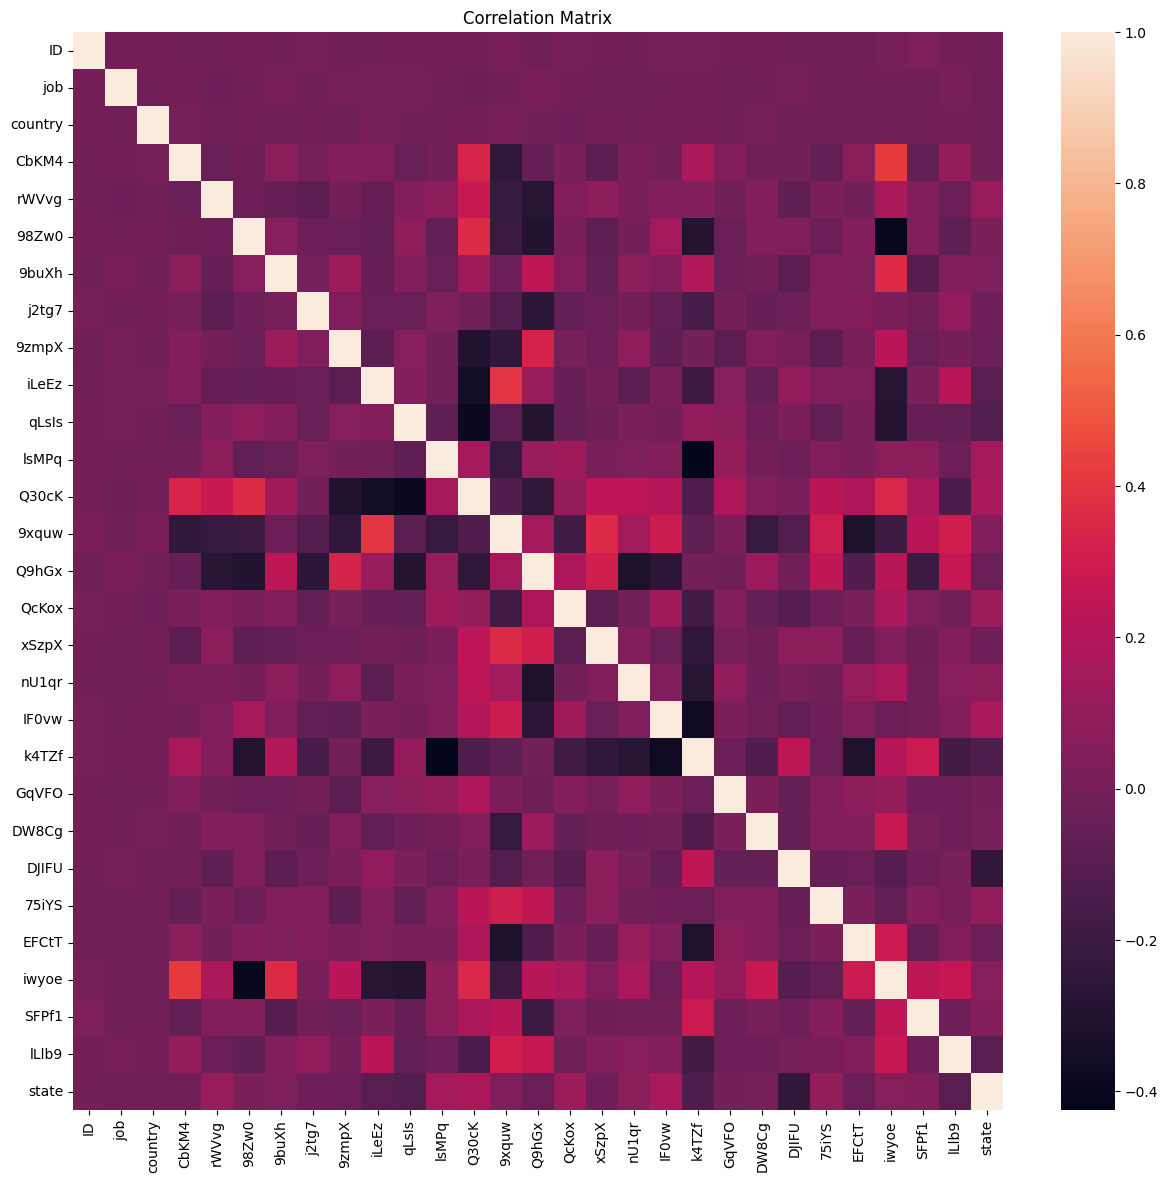

In [7]:
corr = df.corr()
plt.figure(figsize=(15,14))
sns.heatmap(corr)
plt.title('Correlation Matrix')
plt.show()

# lsMPq and Kawff are same

# **Count plot of the target variable**

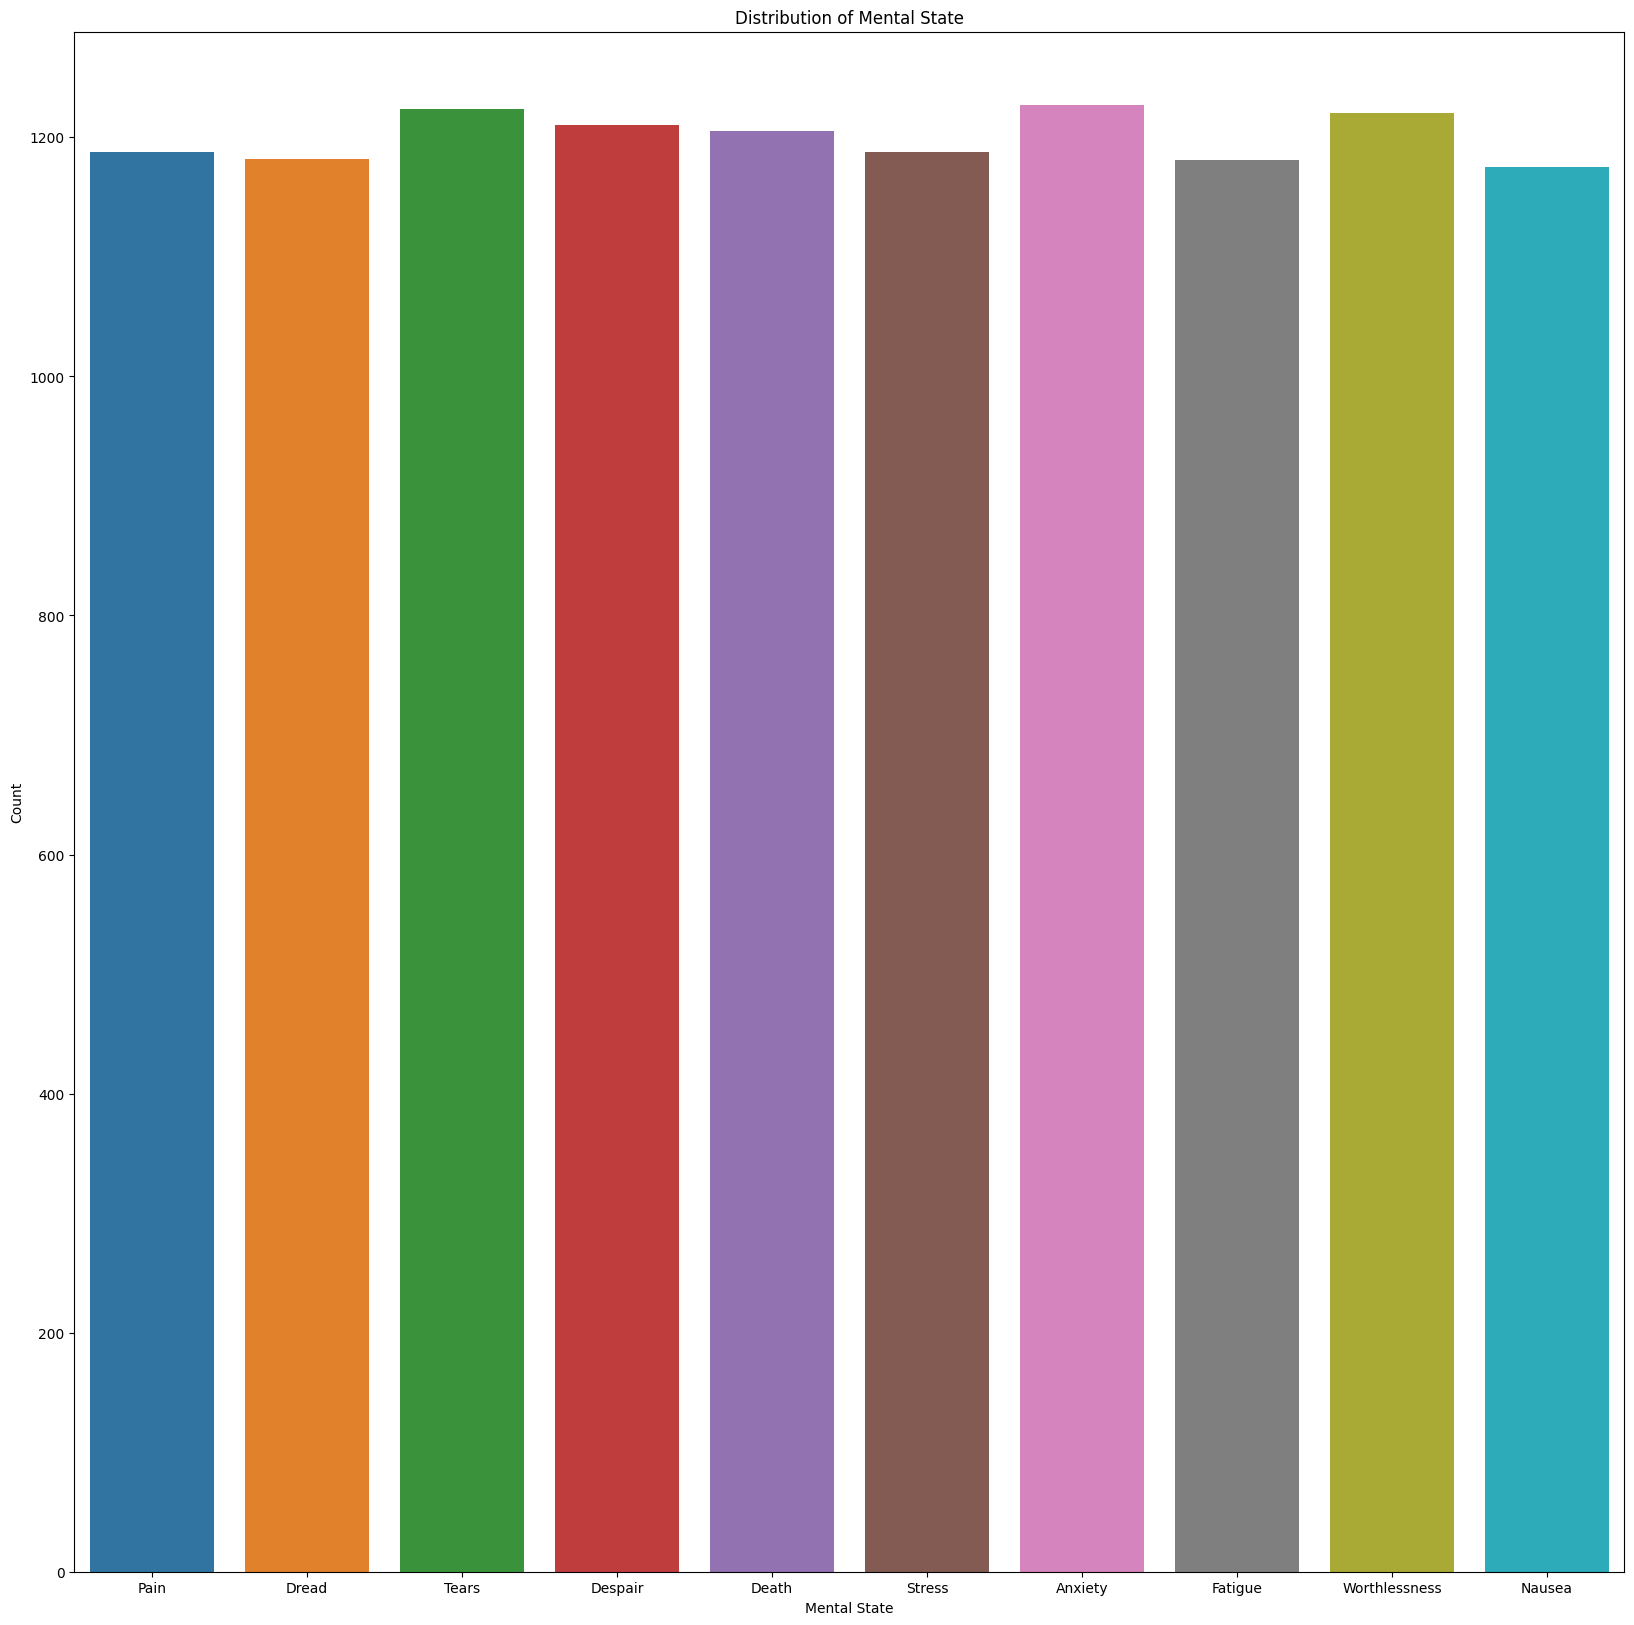

In [8]:
plt.figure(figsize=(20,20))
sns.countplot(x='state', data=kf)
plt.title('Distribution of Mental State')
plt.xlabel('Mental State')
plt.ylabel('Count')
plt.show()

# Statistical Data Analysis

# **Checking For Distribution and Outliers**

In [9]:
#Distribution Plot
'''for col in kf.select_dtypes(include=['number']).columns:
    if col == 'ID':
        continue
    if col == 'state':
        break
    plt.figure(figsize=(15,14))
    sns.histplot(kf[col], kde=False)
    plt.title('Distribution of {}'.format(col))
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

#Boxplot for Outlier identification
for col in kf.select_dtypes(include=['number']).columns:
    if col == 'ID':
        continue
    if col == 'state':
        break
    plt.figure(figsize=(15,14))
    sns.boxplot(x='state', y=col, data=kf)
    plt.title('Box Plot of {} vs state'.format(col))
    plt.xlabel('state')
    plt.ylabel(col)
    plt.show()

#Scatter plot
for col in kf.select_dtypes(include=['number']).columns:
    if col == 'ID':
        continue
    if col == 'state':
        break
    plt.figure(figsize=(15,14))
    sns.scatterplot(x='state', y=col, data=kf)
    plt.title('Box Plot of {} vs state'.format(col))
    plt.xlabel('state')
    plt.ylabel(col)
    plt.show()'''


"for col in kf.select_dtypes(include=['number']).columns:\n    if col == 'ID':\n        continue\n    if col == 'state':\n        break\n    plt.figure(figsize=(15,14))\n    sns.histplot(kf[col], kde=False)\n    plt.title('Distribution of {}'.format(col))\n    plt.xlabel(col)\n    plt.ylabel('Count')\n    plt.show()\n\n#Boxplot for Outlier identification\nfor col in kf.select_dtypes(include=['number']).columns:\n    if col == 'ID':\n        continue\n    if col == 'state':\n        break\n    plt.figure(figsize=(15,14))\n    sns.boxplot(x='state', y=col, data=kf)\n    plt.title('Box Plot of {} vs state'.format(col))\n    plt.xlabel('state')\n    plt.ylabel(col)\n    plt.show()\n\n#Scatter plot\nfor col in kf.select_dtypes(include=['number']).columns:\n    if col == 'ID':\n        continue\n    if col == 'state':\n        break\n    plt.figure(figsize=(15,14))\n    sns.scatterplot(x='state', y=col, data=kf)\n    plt.title('Box Plot of {} vs state'.format(col))\n    plt.xlabel('state')\n

# **Data Cleaning and Preprocessing**

# Encoding Catergorical Data and Scaling Features (Numeric)

In [10]:
le = LabelEncoder()
for col in df[df.columns[1:30]].select_dtypes(include=['object']).columns:
    df[col] = le.fit_transform(df[col])
scaler = StandardScaler()
df.loc[:, df.select_dtypes(include=['number']).columns] = scaler.fit_transform(df.select_dtypes(include=['number']))


# Data Modelling & Training

In [11]:
kf.iloc[:, 28].values

array(['Pain', 'Dread', 'Tears', ..., 'Dread', 'Death', 'Anxiety'],
      dtype=object)

# Setting Features 'x' and Target 'y'

In [12]:
x = df.iloc[:, list(range(1,28))].values
y = kf.iloc[:, 28].values

**Train Test split of features and target**

In [13]:
from sklearn.model_selection import train_test_split
  
xtrain, xtest, ytrain, ytest = train_test_split(
    x, y, test_size=0.25, random_state=0)

Removing NaN from matrix of training set

In [14]:
xtrain[np.isnan(xtrain)] = 0

# Fitting training set into Multinomial Logistic Regression model

In [15]:

from sklearn.linear_model import LogisticRegression
  
classifier = LogisticRegression(multi_class='multinomial',solver ='newton-cg')
classifier.fit(xtrain, ytrain)

LogisticRegression(multi_class='multinomial', solver='newton-cg')

**Reading testing dataset and removing unnecessary columns**

In [16]:
tf = pd.read_csv('/kaggle/input/gdsc-recruitments-2023/test.csv')
tf.drop(['ph_no', 'cvv', 'credit_card_number','email','url','name','6aHwr','PwJxl','Kawff','Yy1lr','cBLeM'], axis=1, inplace=True)

Removing duplication and Encoding Job and Country features 

In [17]:
print(tf.duplicated().sum())
tf.drop_duplicates(inplace=True)
lf = tf[tf.columns[1:29]]
for col in tf[tf.columns[1:]].select_dtypes(include=['object']).columns:
    tf[col] = tf[col].astype('category').cat.codes

0


In [18]:
tf[tf.columns[10:]]

,qLsIs,lsMPq,Q30ck,9xquw,Q9hGx,QcKox,xSzpX,nU1qr,IF0vw,k4TZf,GqVFO,DW8Cg,DJIFU,75iYS,EFCtT,iwyoe,SFPf1,lLlb9
0,-0.446606,-3.810738,6.931677,-0.721960,5.788725,-13.418959,-0.721960,3.837404,-1.428317,-2.679867,-0.330164,-3.416815,5.788725,0.449826,-0.446606,-1.196597,-0.346406,2.712238
1,-0.587173,-2.895960,-0.167469,1.786140,-2.554107,-2.762260,1.786140,-2.727716,-1.833936,-4.719332,0.388804,3.751155,-2.554107,7.434188,-0.587173,NaN,-1.653334,1.444836
2,-1.309990,0.523762,0.748907,-4.142024,-2.874431,2.649068,-4.142024,-0.528456,3.714780,-0.310641,2.769550,4.668468,-2.874431,0.389077,-1.309990,7.849263,0.288236,-2.682191
3,0.636158,-2.104819,-1.655186,2.805290,1.218339,-15.170813,2.805290,-7.470304,-0.133599,2.551568,1.404719,-4.913286,1.218339,2.346675,0.636158,1.172129,-3.615217,5.854074
4,0.623116,-3.598385,1.870723,4.851908,1.888136,3.066691,4.851908,-6.949872,5.843419,-1.875816,-0.186860,1.819577,1.888136,-5.780920,0.623116,0.415203,-3.521486,3.895325
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,0.748963,-1.128899,-3.734533,1.122433,-7.013322,18.716643,1.122433,3.368456,2.515792,0.392909,-0.167262,1.733335,-7.013322,-1.190125,0.748963,-6.021081,1.340346,0.209046
5996,-0.362258,-5.698360,-0.525671,0.871107,-2.081316,-11.968121,0.871107,-2.819383,-1.400202,1.195273,2.178761,0.018187,-2.081316,1.659601,-0.362258,2.294500,1.770980,4.156213
5997,0.426812,-1.905393,-0.340684,4.509837,-1.892450,-0.906164,4.509837,3.225280,1.652191,0.978660,-1.473881,2.987348,-1.892450,1.412920,0.426812,-0.520422,2.229603,-2.596863
5998,-2.794035,-2.981909,6.420766,-5.038908,-1.811103,2.191613,-5.038908,9.168039,-0.279075,3.469731,-2.744100,-1.933514,-1.811103,-2.859913,-2.794035,-5.405068,1.374544,2.881064


Running model on the test dataset and saving it in 'y', target data

In [19]:
tf[np.isnan(tf)] = 0

In [20]:
y = classifier.predict(tf[tf.columns[1:]])

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


# **Building dataframe with ID and Target of test dataset and exporting it as submission.csv file**

In [21]:
submission = pd.DataFrame({'ID': tf['ID'], 'state': y})
submission.to_csv('submission.csv', index=False)